# Релизуйте свой классификатор KNN

### Импорты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. (3 балла) Реализован класс с параметрами по умолчанию
2. (1 балл) Реализовано манхетенское расстояние `(metric='manhattan')`
3. (2 балла) Реализованы веса, зависящие от растояния `(weights='distance')`



In [2]:
def euc_dist(x, y):
    return ((x[0] - y[0])**2 + (x[1] - y[1])**2)**0.5 # функция рассчета евклидова расстояния

def manh_dist(x, y):
    return abs(x[0] - y[0]) + abs(x[1] - y[1])  # функция рассчета манхеттенского расстояния

In [3]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbors: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.metric = metric

    self.X = None
    self.y = None

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.X = X
    self.y = y
    pass

  def predict(self, X: np.ndarray) -> np.ndarray:
    self.output = []
    for point in X:
      arr_dist = []
      for i in range(len(X_train)): # рассчет расстояния в зависимости от метрики
        if self.metric == "euclidean":
          dist = euc_dist(X_train[i], point)
        if self.metric == "manhattan":
          dist = manh_dist(X_train[i], point)
        arr_dist.append(tuple([dist, self.y[i]]))
      arr_dist = sorted(arr_dist)
      arr_neigh = arr_dist[:self.n_neighbors] # берем первые n соседей
      arr_neigh = np.array(arr_neigh)
      if self.weights == "uniform": # классификация по количеству соседей одного класса
        if sum(arr_neigh[:, 1]) > self.n_neighbors // 2:
          self.output.append(1)
        else:
          self.output.append(0)
      if self.weights == "distance":  # классификация с учетом весов соседей
        pred_1 = 0
        pred_0 = 0
        for neighbor in arr_neigh:
          pred_1 += neighbor[1] * (1 / neighbor[0]) # рассчет суммы весов класса 1
          pred_0 += abs(neighbor[1] - 1) * (1 / neighbor[0])  # рассчет суммы весов класса 0
        if pred_1 > pred_0:
          self.output.append(1)
        else:
          self.output.append(0)
    self.output = np.array(self.output)
    pass

### Проверьте решение на датасете и сравните с kNeighborsClassifier из sklearn (4 балла)
1. (1 балл) Выведите accuracy_score для вашего решения и для решения из sklearn, посчитайте в 4 вариациях (Должно получиться 8 чисел)
  1. Параметры по умолчанию
  2. `weights='distance'`
  3. `metric='manhattan'`
  4. `weights='distance'`, `metric='manhattan'`
2. (2 балла) Переберите параметр k от 1 до 10 для каждой модели из пункта выше (получится 4 графика по две линии на каждом)
  1. Переберите параметр, каждый раз обучайте модель
  2. Выведите график зависимости `accuracy` от `k`
  3. На этом же графике выведите пунктирной линией такую же зависимость для модели из sklearn
3. (3 балла) Напишите вывод, сравнение всего, что получилось – получилось ли у вас достичь таких же результатов, как в sklearn, как на результат влияют параметры, какая модель и с какими параметрами оказалась лучшей.



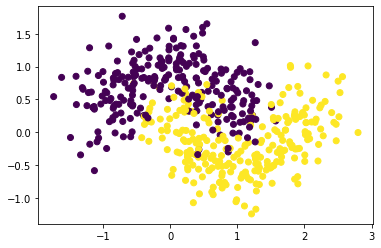

In [4]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Задание 1 (сначала моя реализация, потом из sklearn)
Параметры по умолчанию

In [5]:
sns.set_theme() # приятнее глазу

In [8]:
my_model = MyKNeighborsClassifier()
my_model.fit(X_train, y_train)
my_model.predict(X_test)
accuracy_score(y_test, my_model.output)

0.89

In [9]:
sk_model = KNeighborsClassifier()
sk_model.fit(X_train, y_train)
output = sk_model.predict(X_test)
accuracy_score(y_test, output)

0.89

weights='distance'

In [10]:
my_model = MyKNeighborsClassifier(weights='distance')
my_model.fit(X_train, y_train)
my_model.predict(X_test)
accuracy_score(y_test, my_model.output)

0.87

In [11]:
sk_model = KNeighborsClassifier(weights='distance')
sk_model.fit(X_train, y_train)
output = sk_model.predict(X_test)
accuracy_score(y_test, output)

0.87

metric='manhattan'

In [12]:
my_model = MyKNeighborsClassifier(metric='manhattan')
my_model.fit(X_train, y_train)
my_model.predict(X_test)
accuracy_score(y_test, my_model.output)

0.92

In [13]:
sk_model = KNeighborsClassifier(metric='manhattan')
sk_model.fit(X_train, y_train)
output = sk_model.predict(X_test)
accuracy_score(y_test, output)

0.92

weights='distance', metric='manhattan'

In [14]:
my_model = MyKNeighborsClassifier(metric='manhattan', weights='distance')
my_model.fit(X_train, y_train)
my_model.predict(X_test)
accuracy_score(y_test, my_model.output)

0.88

In [15]:
sk_model = KNeighborsClassifier(metric='manhattan', weights='distance')
sk_model.fit(X_train, y_train)
output = sk_model.predict(X_test)
accuracy_score(y_test, output)

0.88

### Задание 2
Параметры по умолчанию

In [16]:
my_scores = []
sk_scores = []
for k in range(1, 11):
  my_model = MyKNeighborsClassifier(n_neighbors=k)
  my_model.fit(X_train, y_train)
  my_model.predict(X_test)
  my_scores.append(accuracy_score(y_test, my_model.output))

  sk_model = KNeighborsClassifier(n_neighbors=k)
  sk_model.fit(X_train, y_train)
  output = sk_model.predict(X_test)
  sk_scores.append(accuracy_score(y_test, output))

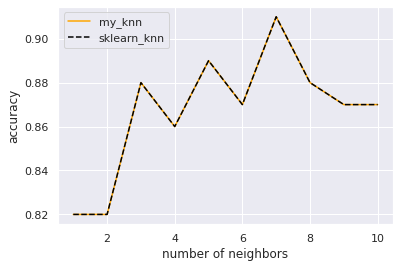

In [17]:
plt.plot(range(1, 11), my_scores, color='orange', label='my_knn')
plt.plot(range(1, 11), sk_scores, linestyle='dashed', color='black', label='sklearn_knn')
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.show()

weights='distance'

In [18]:
my_scores = []
sk_scores = []
for k in range(1, 11):
  my_model = MyKNeighborsClassifier(n_neighbors=k, weights='distance')
  my_model.fit(X_train, y_train)
  my_model.predict(X_test)
  my_scores.append(accuracy_score(y_test, my_model.output))

  sk_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
  sk_model.fit(X_train, y_train)
  output = sk_model.predict(X_test)
  sk_scores.append(accuracy_score(y_test, output))

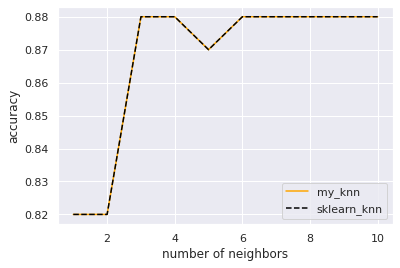

In [19]:
plt.plot(range(1, 11), my_scores, color='orange', label='my_knn')
plt.plot(range(1, 11), sk_scores, linestyle='dashed', color='black', label='sklearn_knn')
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.show()

metric='manhattan'

In [20]:
my_scores = []
sk_scores = []
for k in range(1, 11):
  my_model = MyKNeighborsClassifier(n_neighbors=k, metric='manhattan')
  my_model.fit(X_train, y_train)
  my_model.predict(X_test)
  my_scores.append(accuracy_score(y_test, my_model.output))

  sk_model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
  sk_model.fit(X_train, y_train)
  output = sk_model.predict(X_test)
  sk_scores.append(accuracy_score(y_test, output))

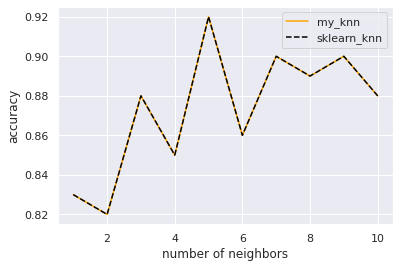

In [21]:
plt.plot(range(1, 11), my_scores, color='orange', label='my_knn')
plt.plot(range(1, 11), sk_scores, linestyle='dashed', color='black', label='sklearn_knn')
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.show()

weights='distance', metric='manhattan'

In [22]:
my_scores = []
sk_scores = []
for k in range(1, 11):
  my_model = MyKNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
  my_model.fit(X_train, y_train)
  my_model.predict(X_test)
  my_scores.append(accuracy_score(y_test, my_model.output))

  sk_model = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
  sk_model.fit(X_train, y_train)
  output = sk_model.predict(X_test)
  sk_scores.append(accuracy_score(y_test, output))

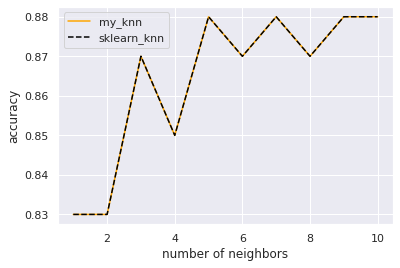

In [23]:
plt.plot(range(1, 11), my_scores, color='orange', label='my_knn')
plt.plot(range(1, 11), sk_scores, linestyle='dashed', color='black', label='sklearn_knn')
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.show()

### Задание 3
### Вывод:

Мне получилось достичь в реализации таких же результатов, как у модели из sklearn.

### Лучший результат:

Модель с параметрами `n_neighbors=5` и `metric='manhattan'` оказалась лучшей: `accuracy=0.92`, при уменьшении/увеличении числа соседей точность уменьшается.

### Остальные модели:

Параметры по умолчанию - наилучший `accuracy=0.91`при `n_neighbors=7`, при других значениях точность падает.

weights='distance' - при `n_neighbors>=6` постоянный `accuracy=0.88`, увеличения точности не наблюдается. 

weights='distance', metric='manhattan'- при `n_neighbors=5,7,...` наблюдается лучший `accuracy=0.88`.